### **Heart Failure Clinical Records**

# Pendahuluan

Penyakit gagal jantung (heart failure) merupakan salah satu penyebab utama kematian di seluruh dunia, terutama di kalangan usia lanjut. Gagal jantung terjadi ketika jantung tidak mampu memompa darah secara efektif untuk memenuhi kebutuhan tubuh. Dalam dunia medis, pencegahan dan penanganan dini terhadap kondisi ini sangat penting untuk meningkatkan tingkat kelangsungan hidup pasien.

Dataset Heart Failure Clinical Records disediakan oleh UCI Machine Learning Repository dan terdiri dari 299 data pasien dengan 12 fitur klinis, serta satu kolom target DEATH_EVENT yang menunjukkan apakah pasien meninggal selama masa pemantauan.

Tujuan utama dari analisis dataset ini adalah untuk membangun model klasifikasi yang dapat memprediksi risiko kematian pasien berdasarkan data medisnya. Hal ini dapat membantu dokter atau tenaga medis dalam mengambil keputusan lebih cepat dan akurat, serta memberikan peringatan dini terhadap pasien dengan risiko tinggi.

Melalui proses eksplorasi data, preprocessing, dan penerapan algoritma machine learning seperti SVM, KNN, dan Naive Bayes, diharapkan dapat diperoleh model dengan performa yang baik untuk memprediksi outcome kesehatan pasien gagal jantung.

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# data (as pandas dataframes)
X = heart_failure_clinical_records.data.features
y = heart_failure_clinical_records.data.targets

# metadata
print(heart_failure_clinical_records.metadata)

# variable information
print(heart_failure_clinical_records.variables)


{'uci_id': 519, 'name': 'Heart Failure Clinical Records', 'repository_url': 'https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records', 'data_url': 'https://archive.ics.uci.edu/static/public/519/data.csv', 'abstract': 'This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 299, 'num_features': 12, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['death_event'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5Z89R', 'creators': [], 'intro_paper': {'ID': 286, 'type': 'NATIVE', 'title': 'Machine learning can predict survival of patients with heart failure f

In [4]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# Ambil data
X = heart_failure_clinical_records.data.features
y = heart_failure_clinical_records.data.targets

# Gabungkan fitur dan target menjadi satu DataFrame
df = pd.concat([X, y], axis=1)

# Simpan ke file CSV
df.to_csv('heart_failure_clinical_records.csv', index=False)

print("Data berhasil disimpan ke 'heart_failure_clinical_records.csv'")


Data berhasil disimpan ke 'heart_failure_clinical_records.csv'


# **Data Understanding**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('/content/heart_failure_clinical_records.csv')


In [6]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nDeskripsi statistik:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None

Missing valu

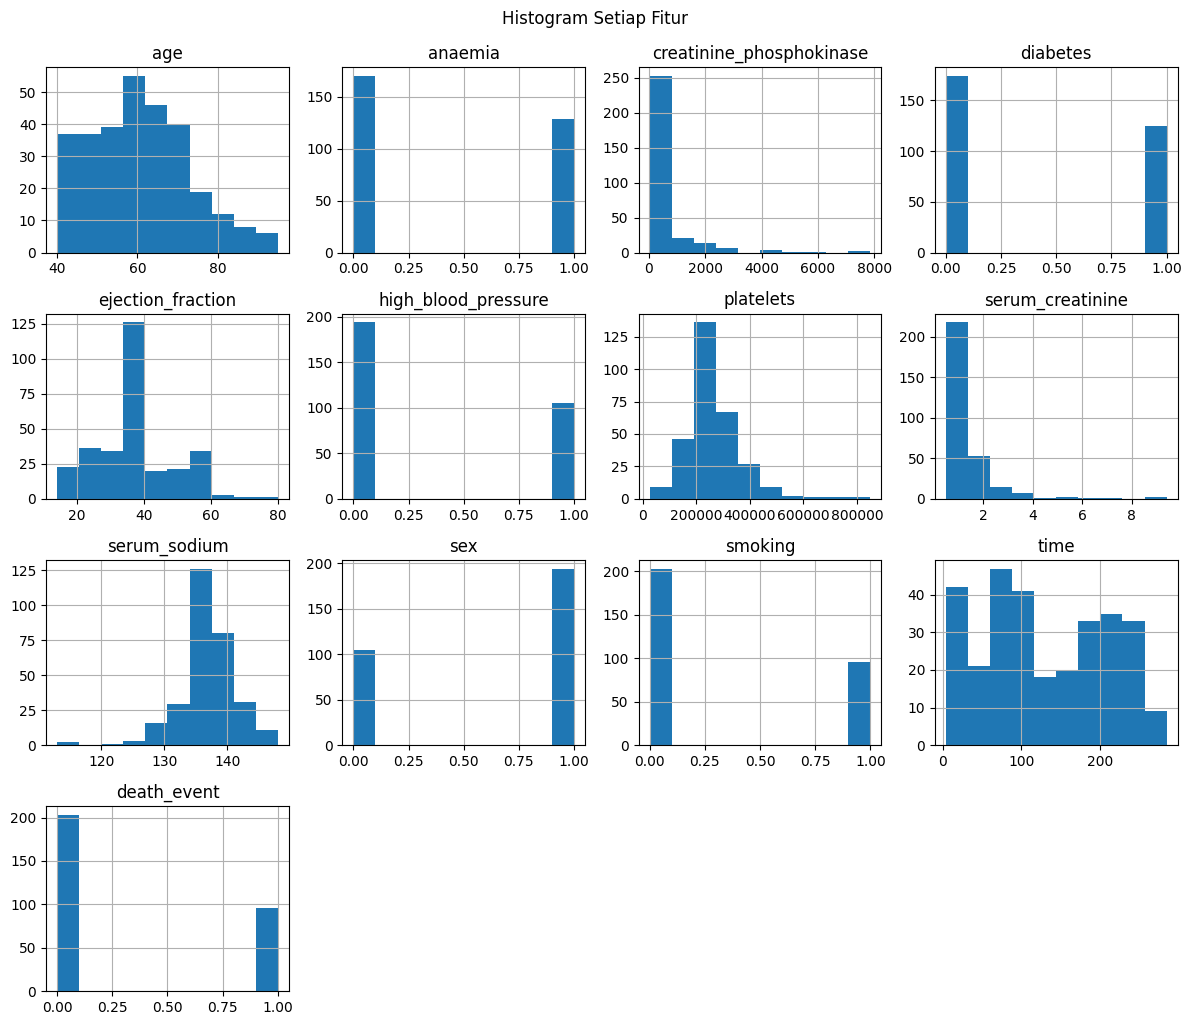

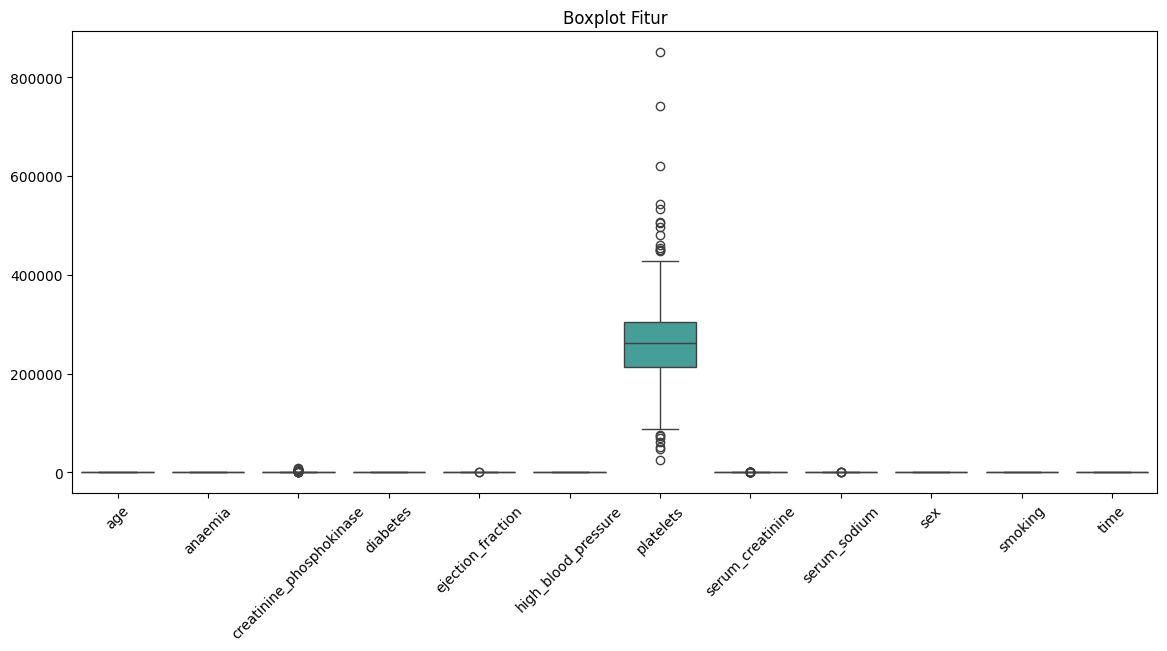

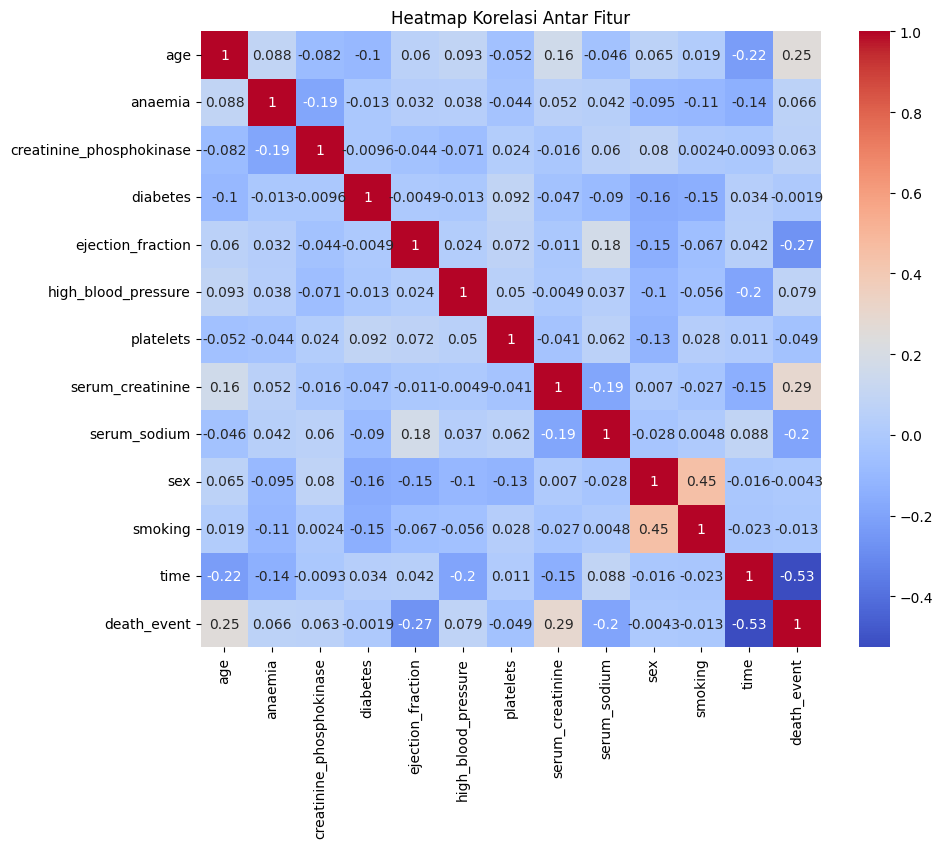

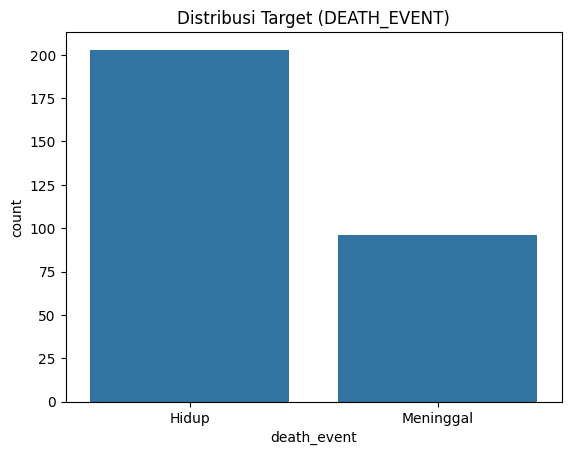

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Fetch dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# Ambil data
X = heart_failure_clinical_records.data.features
y = heart_failure_clinical_records.data.targets

# Gabungkan fitur dan target
df = pd.concat([X, y], axis=1)

# Deteksi nama kolom target yang benar
target_column = [col for col in df.columns if 'death' in col.lower()][0]

# Histogram semua fitur
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.suptitle("Histogram Setiap Fitur", y=1.02)
plt.show()

# Boxplot untuk outlier
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.drop(columns=target_column))
plt.xticks(rotation=45)
plt.title("Boxplot Fitur")
plt.show()

# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

# Countplot target
sns.countplot(x=target_column, data=df)
plt.title("Distribusi Target (DEATH_EVENT)")
plt.xticks([0, 1], ['Hidup', 'Meninggal'])
plt.show()


In [9]:
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])


In [10]:
bins = [0, 40, 60, 100]
labels = ['Muda', 'Dewasa', 'Lansia']
df_scaled['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
print(df_scaled[['age', 'age_group']].head())


        age age_group
0  0.636364    Lansia
1  0.272727    Dewasa
2  0.454545    Lansia
3  0.181818    Dewasa
4  0.454545    Lansia


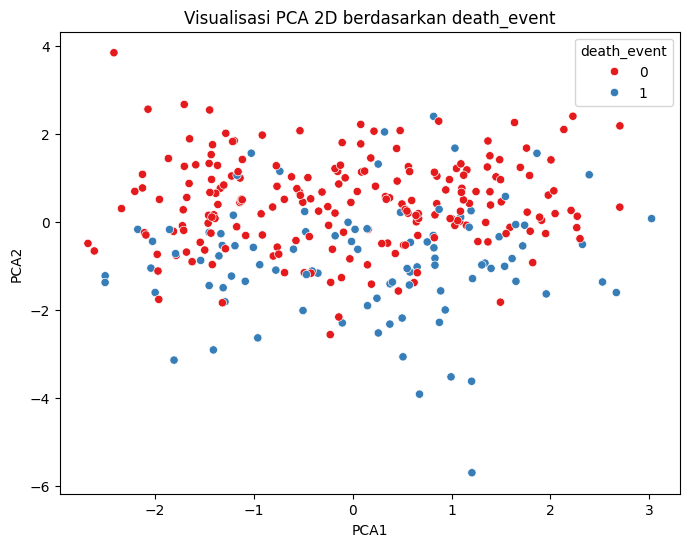

In [13]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Ambil data
data = fetch_ucirepo(id=519)
df = pd.concat([data.data.features, data.data.targets], axis=1)

# 2. Cek nama kolom target
target_col = [col for col in df.columns if 'death' in col.lower()][0]  # otomatis cari 'death'

# 3. Skala data (tanpa kolom target)
features = df.drop(columns=[target_col])
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# 4. Tambahkan kembali kolom target
df_scaled[target_col] = df[target_col].values

# 5. PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled.drop(columns=[target_col]))

df_scaled['PCA1'] = pca_result[:, 0]
df_scaled['PCA2'] = pca_result[:, 1]

# 6. Visualisasi PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue=target_col, data=df_scaled, palette='Set1')
plt.title("Visualisasi PCA 2D berdasarkan " + target_col)
plt.show()


**Struktur Datase**

In [17]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/heart_failure_clinical_records.csv')

# Tampilkan tipe data tiap kolom
print("=== Struktur Dataset (Nama Kolom dan Tipe Data) ===\n")
print(df.dtypes)

# Deskripsi manual setiap fitur
feature_info = {
    "age": "Usia pasien (tahun)",
    "anaemia": "1=anemia, 0=tidak",
    "creatinine_phosphokinase": "Level enzim CPK (mcg/L)",
    "diabetes": "1=diabetes, 0=tidak",
    "ejection_fraction": "Persentase darah keluar tiap detak (%)",
    "high_blood_pressure": "1=hipertensi, 0=tidak",
    "platelets": "Jumlah trombosit (kiloplatelets/mL)",
    "serum_creatinine": "Kadar kreatinin (mg/dL)",
    "serum_sodium": "Kadar sodium (mEq/L)",
    "sex": "1=laki-laki, 0=perempuan",
    "smoking": "1=merokok, 0=tidak",
    "time": "Hari observasi",
    "DEATH_EVENT": "Target: 1=meninggal, 0=hidup"
}

# Gabungkan struktur ke DataFrame
structure_df = pd.DataFrame({
    'Fitur': df.columns,
    'Tipe Data': [df[col].dtype.name for col in df.columns],
    'Deskripsi': [feature_info.get(col, '-') for col in df.columns]
})

print("\n=== Struktur Lengkap Dataset ===")
print(structure_df.to_string(index=False))


=== Struktur Dataset (Nama Kolom dan Tipe Data) ===

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
death_event                   int64
dtype: object

=== Struktur Lengkap Dataset ===
                   Fitur Tipe Data                              Deskripsi
                     age   float64                    Usia pasien (tahun)
                 anaemia     int64                      1=anemia, 0=tidak
creatinine_phosphokinase     int64                Level enzim CPK (mcg/L)
                diabetes     int64                    1=diabetes, 0=tidak
       ejection_fraction     int64 Persentase darah keluar ti

# Jumlah Fitur

Dataset **Heart Failure Clinical Records** memiliki total **13 kolom** yang terdiri dari **12 fitur prediktif** dan **1 kolom target (label)**. Fitur-fitur ini berisi data klinis pasien seperti usia, tekanan darah, kadar kreatinin, kadar sodium, apakah pasien memiliki diabetes, anemia, dan sebagainya.

Dua belas fitur tersebut digunakan sebagai input untuk memprediksi kemungkinan pasien mengalami kematian dalam periode observasi. Sedangkan kolom `DEATH_EVENT` berfungsi sebagai target atau label, di mana:

* Nilai **1** menunjukkan pasien **meninggal**, dan
* Nilai **0** menunjukkan pasien **bertahan hidup**.

Fitur-fitur dalam dataset ini semuanya bertipe numerik atau biner, sehingga langsung dapat digunakan dalam berbagai algoritma klasifikasi tanpa perlu proses encoding tambahan.


# **Identifikasi Kualitas Dataset**

Dataset Heart Failure Clinical Records secara umum memiliki kualitas yang cukup baik dan siap digunakan untuk analisis lebih lanjut. Berikut adalah hasil identifikasinya:

1. Missing Values (Data Hilang):
Tidak ditemukan data yang hilang pada seluruh kolom dalam dataset. Setiap baris terisi lengkap sehingga tidak diperlukan proses imputasi atau penghapusan data kosong.
2. Tipe Data Konsisten:
Semua fitur bertipe numerik atau biner. Tidak ada nilai string atau format campuran yang dapat mengganggu proses analisis. Ini memudahkan proses preprocessing dan penerapan algoritma machine learning.
3. Outlier (Nilai Pencilan):

Terdapat beberapa kemungkinan outlier pada fitur numerik, seperti:


*   creatinine_phosphokinase dengan nilai yang sangat tinggi (>7000 mcg/L)
*   serum_creatinine dengan nilai tinggi (>5 mg/dL)


*   platelets dengan nilai sangat rendah
Meskipun nilai-nilai ini ekstrem, bisa jadi memang mencerminkan kondisi medis tertentu, sehingga perlu dikaji lebih lanjut apakah perlu dihapus atau tetap dipertahankan.
4. Distribusi Kelas (Label):

Distribusi target DEATH_EVENT agak tidak seimbang:


*   203 pasien bertahan hidup (label 0)
*   96 pasien meninggal (label 1)
Ini bisa memengaruhi performa model klasifikasi dan mungkin memerlukan strategi seperti resampling (oversampling/undersampling) atau penggunaan metrik evaluasi yang sensitif terhadap imbalance (seperti f1-score).
5. Redundansi dan Duplikasi:
Tidak ditemukan baris duplikat dalam dataset. Setiap baris merepresentasikan satu pasien unik dengan catatan medis masing-masing.







In [18]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/heart_failure_clinical_records.csv')

# Tampilkan ringkasan data
print("=== Informasi Dataset ===")
print(df.info())
print("\n=== 5 Baris Pertama ===")
print(df.head())


=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 

In [19]:
# Cek apakah ada missing values
print("\n=== Missing Value per Kolom ===")
print(df.isnull().sum())


=== Missing Value per Kolom ===
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64


In [20]:
# Cek apakah ada duplikat baris
print("\n=== Jumlah Duplikasi ===")
print(df.duplicated().sum())



=== Jumlah Duplikasi ===
0


In [21]:
# Statistik deskriptif fitur numerik
print("\n=== Statistik Deskriptif ===")
print(df.describe())



=== Statistik Deskriptif ===
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%       

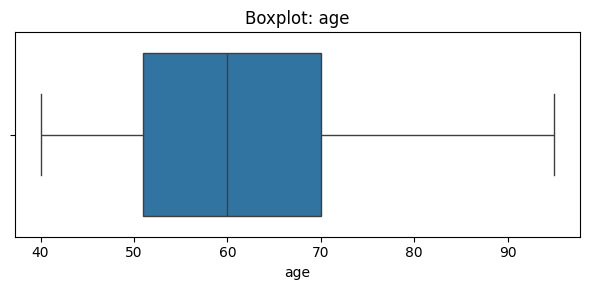

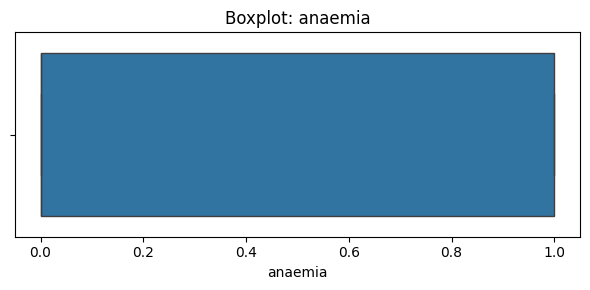

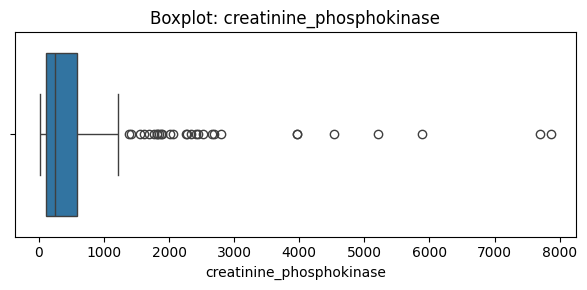

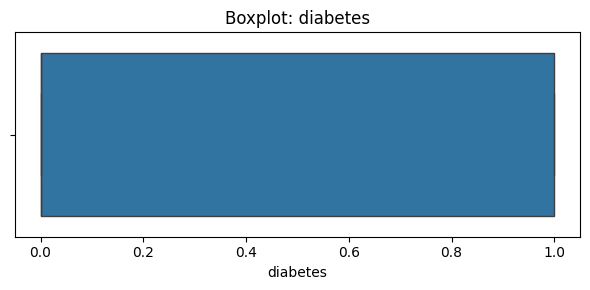

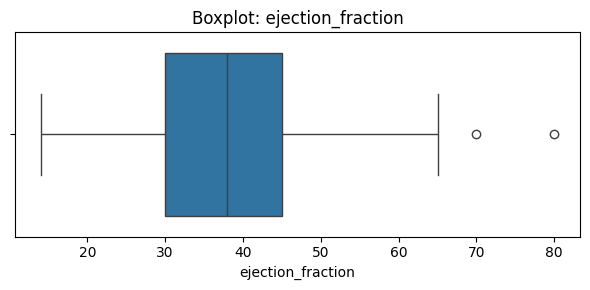

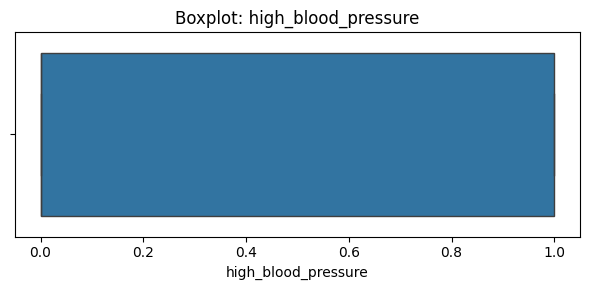

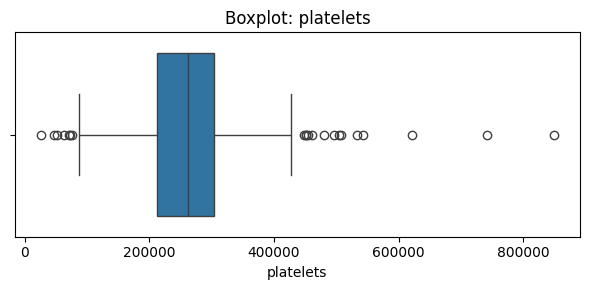

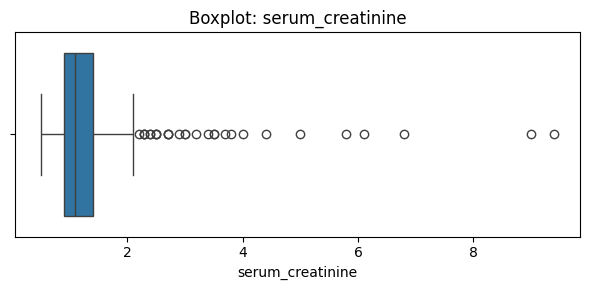

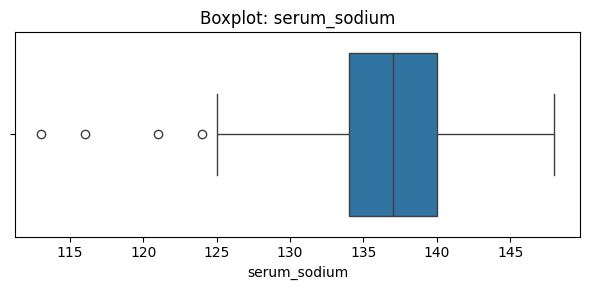

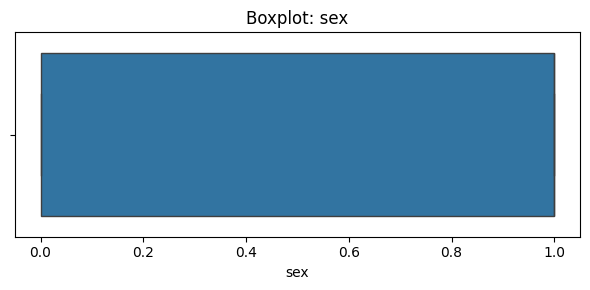

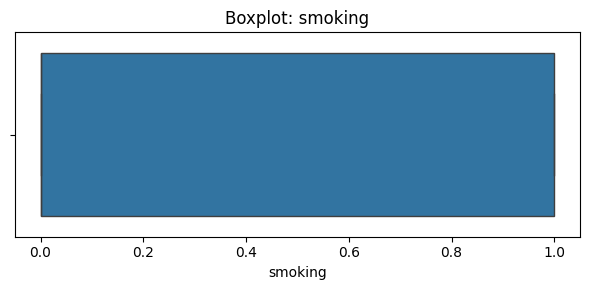

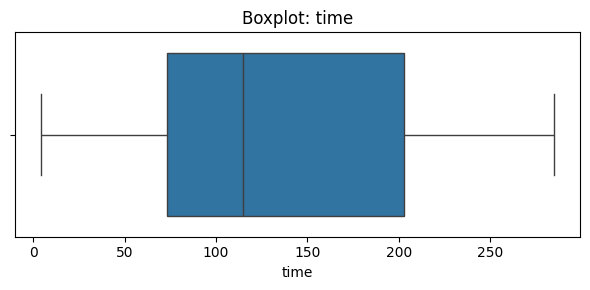

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar fitur numerik (kecuali label)
features = df.drop(columns='death_event').columns

# Tampilkan boxplot satu per satu
for col in features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()


# Fitur dengan missing value nantinya akan dilakukan imputasi dengan 3 metode, yaitu SVM,KNN,Neive Bayes pada Preprocessing.

## Prepocessing data

# Tranformasi Data

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 1. Load dataset
df = pd.read_csv('/content/heart_failure_clinical_records.csv')

# 2. Pisahkan fitur dan target
X = df.drop(columns='death_event')   # 12 fitur
y = df['death_event']                # label target

# 3. Normalisasi fitur (untuk SVM & KNN penting)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 4. Split data 80% latih, 20% uji (stratify agar label seimbang)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


## Imputasi Mising Value

# Imputasi Mising Value dengan svm

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# 1. Load dataset
df = pd.read_csv('/content/heart_failure_clinical_records.csv')

# 2. Pisahkan fitur dan target
X = df.drop(columns= 'death_event')
y = df['death_event']

# 3. Imputasi missing value (jika ada), misal dengan mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# 4. Normalisasi data (untuk SVM)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


# Imputasi Mising Value dengan knn

In [33]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 1. Load dataset
df = pd.read_csv('/content/heart_failure_clinical_records.csv')

# 2. Pisahkan fitur dan target
X = df.drop(columns='death_event')
y = df['death_event']

# 3. Normalisasi sebelum KNN Imputer (wajib, karena KNN pakai jarak)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 4. Imputasi dengan KNN (contoh: n_neighbors=5)
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X_scaled)

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y
)


# Imputasi Mising Value naive bayes

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# 1. Load dataset
df = pd.read_csv('/content/heart_failure_clinical_records.csv')

# 2. Pisahkan fitur dan label
X = df.drop(columns='death_event')
y = df['death_event']

# 3. Imputasi missing value (pakai mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# 4. Normalisasi (opsional, Naive Bayes tidak terlalu sensitif terhadap skala)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


# Pendeteksi outlier

Visualisasi Outlier (IQR Method)

In [35]:
import pandas as pd

# Load data
df = pd.read_csv('/content/heart_failure_clinical_records.csv')

# Kolom numerik saja (kecuali target)
num_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns='death_event')

# Deteksi outlier dengan IQR
outlier_indices = {}

for col in num_cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_indices[col] = outliers.index.tolist()

# Tampilkan hasil
for col, idx in outlier_indices.items():
    print(f"Kolom '{col}' memiliki {len(idx)} outlier")


Kolom 'age' memiliki 0 outlier
Kolom 'anaemia' memiliki 0 outlier
Kolom 'creatinine_phosphokinase' memiliki 29 outlier
Kolom 'diabetes' memiliki 0 outlier
Kolom 'ejection_fraction' memiliki 2 outlier
Kolom 'high_blood_pressure' memiliki 0 outlier
Kolom 'platelets' memiliki 21 outlier
Kolom 'serum_creatinine' memiliki 29 outlier
Kolom 'serum_sodium' memiliki 4 outlier
Kolom 'sex' memiliki 0 outlier
Kolom 'smoking' memiliki 0 outlier
Kolom 'time' memiliki 0 outlier


# Lakukan klasifikasi terhadap data tersebut sesuai context data tersebut terhadap data tersebut

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load data
df = pd.read_csv('/content/heart_failure_clinical_records.csv')

# Pisahkan fitur dan target
X = df.drop(columns='death_event')
y = df['death_event']

# Normalisasi fitur (SVM dan KNN sangat bergantung pada skala)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data latih dan uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [37]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("=== SVM ===")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


=== SVM ===
[[40  1]
 [11  8]]
              precision    recall  f1-score   support

           0       0.78      0.98      0.87        41
           1       0.89      0.42      0.57        19

    accuracy                           0.80        60
   macro avg       0.84      0.70      0.72        60
weighted avg       0.82      0.80      0.78        60



In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("=== KNN ===")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


=== KNN ===
[[38  3]
 [16  3]]
              precision    recall  f1-score   support

           0       0.70      0.93      0.80        41
           1       0.50      0.16      0.24        19

    accuracy                           0.68        60
   macro avg       0.60      0.54      0.52        60
weighted avg       0.64      0.68      0.62        60



In [39]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("=== Naive Bayes ===")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


=== Naive Bayes ===
[[36  5]
 [13  6]]
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        41
           1       0.55      0.32      0.40        19

    accuracy                           0.70        60
   macro avg       0.64      0.60      0.60        60
weighted avg       0.67      0.70      0.67        60



# Evaluasi Data

In [40]:
from sklearn.metrics import accuracy_score

# SVM
print("=== Evaluasi: Support Vector Machine (SVM) ===")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Akurasi SVM:", accuracy_score(y_test, y_pred_svm))

# KNN
print("\n=== Evaluasi: K-Nearest Neighbors (KNN) ===")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("Akurasi KNN:", accuracy_score(y_test, y_pred_knn))

# Naive Bayes
print("\n=== Evaluasi: Naive Bayes ===")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print("Akurasi Naive Bayes:", accuracy_score(y_test, y_pred_nb))


=== Evaluasi: Support Vector Machine (SVM) ===
[[40  1]
 [11  8]]
              precision    recall  f1-score   support

           0       0.78      0.98      0.87        41
           1       0.89      0.42      0.57        19

    accuracy                           0.80        60
   macro avg       0.84      0.70      0.72        60
weighted avg       0.82      0.80      0.78        60

Akurasi SVM: 0.8

=== Evaluasi: K-Nearest Neighbors (KNN) ===
[[38  3]
 [16  3]]
              precision    recall  f1-score   support

           0       0.70      0.93      0.80        41
           1       0.50      0.16      0.24        19

    accuracy                           0.68        60
   macro avg       0.60      0.54      0.52        60
weighted avg       0.64      0.68      0.62        60

Akurasi KNN: 0.6833333333333333

=== Evaluasi: Naive Bayes ===
[[36  5]
 [13  6]]
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        41
        